In [77]:

import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,  Activation, Conv2D, MaxPool2D,ConvLSTM2D, MaxPooling2D,LSTM,Conv1D,MaxPool1D,GlobalAveragePooling1D,TimeDistributed,MaxPooling1D
from keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from keras.utils.vis_utils import plot_model

import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import keras




In [149]:
MicroC = pd.read_csv("MicroCombined_CumulativeMedication.csv")
MicroC = MicroC.select_dtypes(include='float').astype(int).join(MicroC.select_dtypes(exclude='float'))

MicroC.info()
MicroC.head(40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ciprofloxacin                    16800 non-null  int32 
 1   Ceftazidime                      16800 non-null  int32 
 2   Meropenem                        16800 non-null  int32 
 3   Pip/Tazo                         16800 non-null  int32 
 4   Tob                              16800 non-null  int32 
 5   MDR                              16800 non-null  int32 
 6   Ceftazidime_Cumulative2years     16800 non-null  int32 
 7   Tobramycin_Cumulative2years      16800 non-null  int32 
 8   Meropenem_Cumulative2years       16800 non-null  int32 
 9   Colistimethate_Cumulative2years  16800 non-null  int32 
 10  Fosfomycin_Cumulative2years      16800 non-null  int32 
 11  Aztreonam_Cumulative2years       16800 non-null  int32 
 12  Tazocin_Cumulative2years        

,Ciprofloxacin,Ceftazidime,Meropenem,Pip/Tazo,Tob,MDR,Ceftazidime_Cumulative2years,Tobramycin_Cumulative2years,Meropenem_Cumulative2years,Colistimethate_Cumulative2years,...,Aztreonam_Cumulative2years,Tazocin_Cumulative2years,Co-trimoxazole_Cumulative2years,Temocillin_Cumulative2years,Teicoplanin_Cumulative2years,StudyNumber,Date,ORG.1,Pseudomonas,Specimen
0,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,205,2012-11-30,PYOMO,1,"C,22.0443043.FA"
1,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,205,2012-11-30,PYOS,1,"C,22.0443043.FA"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,205,2012-11-30,STAU,0,"C,22.0443043.FA"
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,41,2013-01-01,Pseudomona,1,"C,13.0140020.BA"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,41,2013-01-01,Pseudomona,1,"C,13.0140020.BA"
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,41,2013-01-01,Staphyloco,0,"C,13.0140020.BA"
6,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,37,2013-01-02,Pseudomona,1,"C,13.0140068.TA"
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,2013-01-02,Pseudomona,1,"C,13.0140068.TA"
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,2013-01-02,Pseudomona,1,"C,13.0140068.TA"
9,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,55,2013-01-02,Staphyloco,0,"C,13.0140069.MA"


In [150]:
from sklearn.preprocessing import LabelEncoder

MicroC['Date']= pd.to_datetime(MicroC['Date'])
MicroC = MicroC.sort_values('Date')

#MicroC = MicroC.drop([ 'ORG.1', 'Pseudomonas'], axis=1)



In [151]:
# Convert categorical features to numeric
label_encoder = LabelEncoder()
MicroC['Specimen'] = label_encoder.fit_transform(MicroC['Specimen'])
MicroC['ORG.1'] = label_encoder.fit_transform(MicroC['ORG.1'])

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and multiple output columns
features = MicroC.drop(columns=['Tobramycin_Cumulative2years', 'Ceftazidime_Cumulative2years', 
'Meropenem_Cumulative2years', 'Colistimethate_Cumulative2years', 'Fosfomycin_Cumulative2years', 'Aztreonam_Cumulative2years',
'Tazocin_Cumulative2years','Temocillin_Cumulative2years','Teicoplanin_Cumulative2years','Co-trimoxazole_Cumulative2years'])
labels = MicroC[['Tobramycin_Cumulative2years', 'Ceftazidime_Cumulative2years', 
'Meropenem_Cumulative2years', 'Colistimethate_Cumulative2years', 'Fosfomycin_Cumulative2years', 'Aztreonam_Cumulative2years',
'Tazocin_Cumulative2years','Temocillin_Cumulative2years','Teicoplanin_Cumulative2years','Co-trimoxazole_Cumulative2years']]


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)

# Verify the split
print("Training Data Shape:", train_features.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_features.shape)
print("Test Labels Shape:", test_labels.shape)




Training Data Shape: (13440, 11)
Training Labels Shape: (13440, 10)
Test Data Shape: (3360, 11)
Test Labels Shape: (3360, 10)


In [153]:
# Reshape the input data for LSTM
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


In [154]:
# Define the LSTM model
#model = Sequential()
#model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
#model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))  # Update the number of units to 2

# Compile and train the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [155]:
# reset tensorflow session
from tensorflow.keras import backend as K
K.clear_session()

In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train_dates = pd.to_datetime(train_features['Date'])
train_features['Year'] = train_dates.dt.year
train_features['Month'] = train_dates.dt.month
train_features['Day'] = train_dates.dt.day

test_dates = pd.to_datetime(test_features['Date'])
test_features['Year'] = test_dates.dt.year
test_features['Month'] = test_dates.dt.month
test_features['Day'] = test_dates.dt.day

train_numeric_features = train_features.drop('Date', axis=1)
test_numeric_features = test_features.drop('Date', axis=1)

scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(train_numeric_features)
test_features_scaled = scaler.transform(test_numeric_features)

# One-hot encode the temporal features
# One-hot encode the temporal features
# Apply one-hot encoding to the 'Specimen' column
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [train_numeric_features.columns.get_loc('Specimen')])],
    remainder='passthrough'
)
column_transformer = ColumnTransformer(
    [
        ('encoder', OneHotEncoder(categories='auto', handle_unknown='ignore'), [0, 1, 2])
    ],
    remainder='passthrough'
)
train_features_encoded = column_transformer.fit_transform(train_features_scaled)
test_features_encoded = column_transformer.transform(test_features_scaled)


In [157]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(train_features_encoded.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Flatten()) 
model.add(Dense(labels.shape[1]))


model.compile(loss='mean_squared_error', optimizer='adam')

# Print model summary
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 32)                2

In [158]:
labels.shape[1]

10

In [166]:
train_features_array = train_features_encoded
train_labels_array = train_labels.values

test_features_array = test_features_encoded
test_labels_array = test_labels.values

model.fit(train_features_array, train_labels_array, epochs=10, batch_size=64)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [147]:
loss = model.evaluate(test_features_array, test_labels_array)
print("Test Loss:", loss)

predictions = model.predict(test_features_array)
print("Predictions:", predictions)


105/105 [==============================] - 1s 4ms/step - loss: 6.5796
Test Loss: 6.579556941986084
105/105 [==============================] - 1s 4ms/step
Predictions: [[-0.00805786 -0.00521127 -0.02419946 ... -0.00443424 -0.01109567
  -0.02419319]
 [-0.00819066 -0.00497411 -0.02389032 ... -0.00465557 -0.01116439
  -0.02445779]
 [ 0.0189305  -0.00320812 -0.03639    ...  0.01209262 -0.01200102
  -0.03802533]
 ...
 [-0.00775997 -0.00604413 -0.02446592 ... -0.00516662 -0.01133168
  -0.0252709 ]
 [-0.00035879 -0.00774473 -0.02972048 ...  0.00115994 -0.0121764
  -0.03413485]
 [-0.00752403 -0.00597785 -0.02468356 ... -0.00477067 -0.01137531
  -0.02582712]]


In [160]:

test_predictions = model.predict(test_features_array)

test_predictions_binary = (test_predictions > 0.5).astype(int)

accuracy = (test_predictions_binary == test_labels_array).mean()

print("Accuracy:", accuracy)


105/105 [==============================] - 1s 4ms/step
Accuracy: 0.4110714285714286


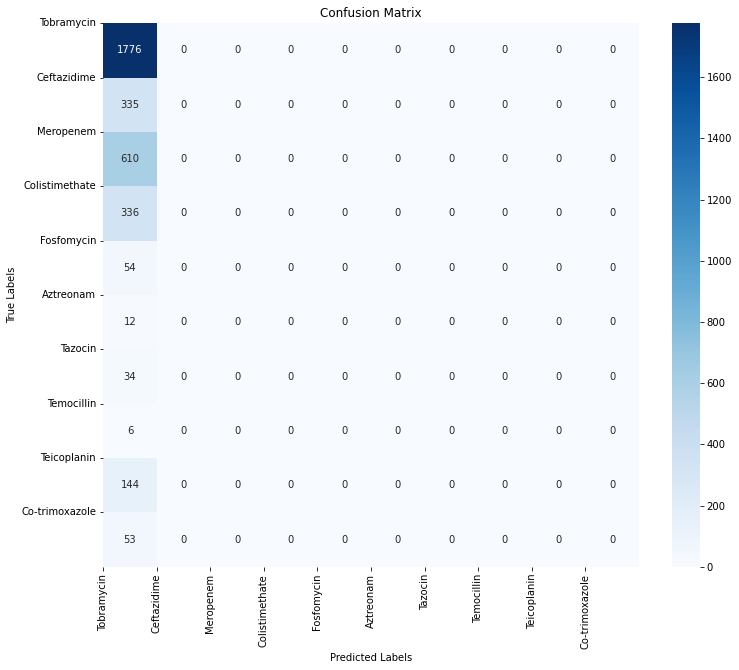

In [161]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

test_predictions_binary = test_predictions_binary.reshape(test_labels_array.shape)

test_labels = np.argmax(test_labels_array, axis=1)

test_predictions = np.argmax(test_predictions_binary, axis=1)

cm = confusion_matrix(test_labels, test_predictions)

# Get the label names
label_names = ['Tobramycin', 'Ceftazidime', 'Meropenem', 'Colistimethate', 'Fosfomycin', 'Aztreonam','Tazocin','Temocillin','Teicoplanin','Co-trimoxazole'] 
plt.figure(figsize=(12, 10))


sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


tick_labels = [label_names[i] for i in range(len(label_names))]
plt.xticks(np.arange(len(label_names)), tick_labels, rotation='vertical')
plt.yticks(np.arange(len(label_names)), tick_labels, rotation=0)
plt.savefig('confusion_matrix_LSTM_antiOutput.png', dpi=400)

plt.show()


In [162]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert the predicted labels and true labels to integer format
test_predictions_int = np.argmax(test_predictions, axis=1)
test_labels_int = np.argmax(test_labels_array, axis=1)

# Reshape the arrays if needed
test_predictions_int = test_predictions_int.reshape(-1, 1)
test_labels_int = test_labels_int.reshape(-1, 1)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(test_labels_int, test_predictions_int, average=None)
recall = recall_score(test_labels_int, test_predictions_int, average=None)
f1 = f1_score(test_labels_int, test_predictions_int, average=None)


AxisError: axis 1 is out of bounds for array of dimension 1

In [163]:
# Plot the epoch curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Epoch Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

# Define the model architecture
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(train_features_encoded.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Flatten()) 
model.add(Dense(labels.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Define the learning rate
learning_rate = 0.002

# Define the optimizer with the learning rate
optimizer = RMSprop(learning_rate=learning_rate)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
print(model.summary())



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 14, 32)            128       
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 7, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 5, 32)             3104      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 2, 32)            0         
 g1D)                                                            
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dense_27 (Dense)            (None, 32)              

In [197]:

# Convert data to arrays
train_features_array = train_features_encoded
train_labels_array = train_labels
test_features_array = test_features_encoded
test_labels_array = test_labels

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
]
# Train the model
history = model.fit(train_features_array, train_labels_array, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
168/168 [==============================] - 15s 48ms/step - loss: 3.7798 - accuracy: 0.1227 - val_loss: 6.8423 - val_accuracy: 0.1080
Epoch 2/20
168/168 [==============================] - 5s 29ms/step - loss: 3.6716 - accuracy: 0.3180 - val_loss: 6.7742 - val_accuracy: 0.1061
Epoch 3/20
168/168 [==============================] - 5s 31ms/step - loss: 3.6440 - accuracy: 0.3399 - val_loss: 6.7722 - val_accuracy: 0.1061
Epoch 4/20
168/168 [==============================] - 5s 31ms/step - loss: 3.6354 - accuracy: 0.3453 - val_loss: 6.7716 - val_accuracy: 0.1061
Epoch 5/20
168/168 [==============================] - 5s 32ms/step - loss: 3.6309 - accuracy: 0.3361 - val_loss: 6.7686 - val_accuracy: 0.1061
Epoch 6/20
168/168 [==============================] - 5s 28ms/step - loss: 3.6264 - accuracy: 0.3300 - val_loss: 6.7645 - val_accuracy: 0.1061
Epoch 7/20
168/168 [==============================] - 5s 30ms/step - loss: 3.6241 - accuracy: 0.3374 - val_loss: 6.7630 - val_accuracy: 0.106

In [198]:
loss = model.evaluate(test_features_array, test_labels_array)
print("Test Loss:", loss)

loss = model.evaluate(test_features_array, test_labels_array)
print("Test accuracy:", accuracy)



105/105 [==============================] - 1s 2ms/step - loss: 4.7476 - accuracy: 0.0997
Test Loss: [4.747608184814453, 0.0997023805975914]
105/105 [==============================] - 0s 1ms/step - loss: 4.7476 - accuracy: 0.0997
Test accuracy: 0.4110714285714286


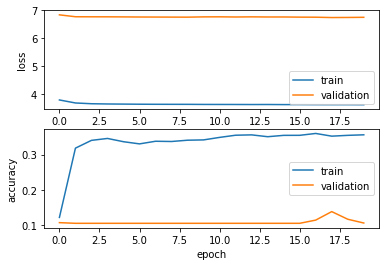

In [199]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.savefig('Epoch2yearsoutput.png', dpi=400)

    return;

plot_history(history)